In [1]:
## importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df1 = pd.read_csv('test.csv')

In [3]:
df2 = pd.read_csv('train.csv')

In [4]:
df1.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
df1.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df2.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

In [20]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
print("shape of titanic_train:", titanic_train.shape)
print("shape of titanic_test:", titanic_test.shape)

shape of titanic_train: (891, 12)
shape of titanic_test: (418, 11)


In [24]:
titanic = pd.concat([titanic_train, titanic_test], axis=0, sort=False)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


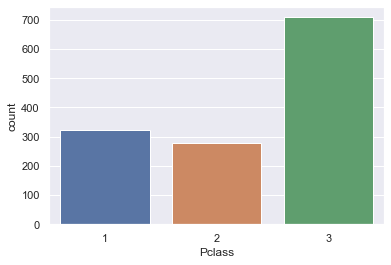

In [25]:
ax = sns.countplot(titanic['Pclass'])

Mean: 29.881137667304014
Median: 28.0
44.29463087857535 58.70812408984668 73.12161730111802


d:\Anaconda4\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Mean: 29.746567593480343
Median: 28.0


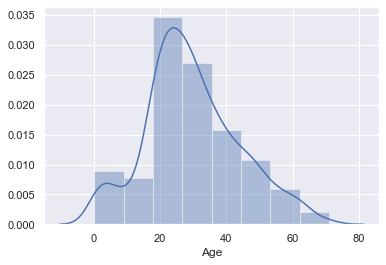

In [27]:
print("Mean:",titanic['Age'].mean())
print("Median:",titanic['Age'].median())
print((titanic['Age'].mean() + titanic['Age'].std()), (titanic['Age'].mean() + (2 * titanic['Age'].std())), (titanic['Age'].mean() + (3 * titanic['Age'].std())))
titanic = titanic[titanic['Age'] <= 73]
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
sns.distplot(titanic['Age'], bins=8)
print("Mean:",titanic['Age'].mean())
print("Median:",titanic['Age'].median())

In [28]:
display(titanic.corr()['Age'])

PassengerId    0.025194
Survived      -0.080900
Pclass        -0.408913
Age            1.000000
SibSp         -0.245786
Parch         -0.148566
Fare           0.181206
Name: Age, dtype: float64

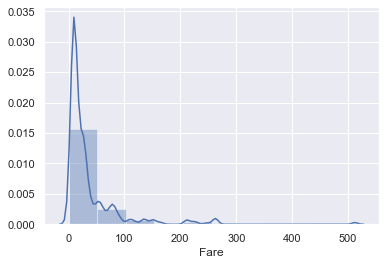

In [30]:
sns.distplot(titanic['Fare'], bins=10)

36.67977821497117
15.75
92.46967788480757 148.25957755464395 204.04947722448037
Minimum: 0.0
Maximum: 512.3292
Minimum: 0.0
Maximum: 164.8667
28.365345029821018
14.75
0


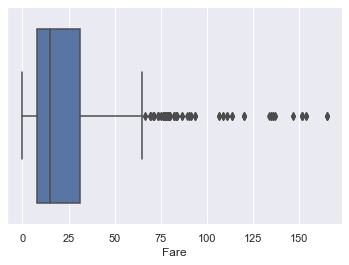

In [31]:
print(titanic['Fare'].mean())
print(titanic['Fare'].median())
print((titanic['Fare'].mean() + titanic['Fare'].std()),(titanic['Fare'].mean() + (2 * titanic['Fare'].std())),(titanic['Fare'].mean() + (3 * titanic['Fare'].std())))
print("Minimum:", titanic['Fare'].min())
print("Maximum:", titanic['Fare'].max())
titanic = titanic[titanic['Fare'] <= 202]
print("Minimum:", titanic['Fare'].min())
print("Maximum:", titanic['Fare'].max())
print(titanic['Fare'].mean())
print(titanic['Fare'].median())
sns.boxplot(titanic['Fare'])
print(titanic['Fare'].isnull().sum())

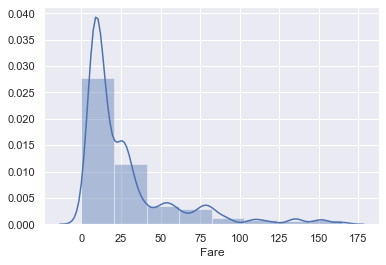

In [32]:
sns.distplot(titanic['Fare'], bins=8)

In [33]:
print(titanic.shape)

(1006, 12)


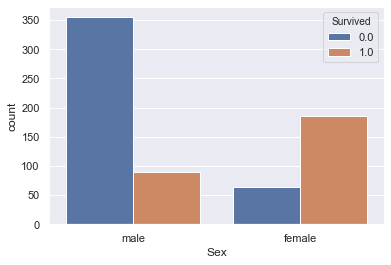

In [35]:
sns.countplot('Sex', hue='Survived', data=titanic)

In [37]:
titanic['Name'] = titanic['Name'].apply(lambda x: "Mrs" if "Mrs" in x else ("Mr" if "Mr" in x else ("Miss")))
display(titanic.head(500))
display(titanic['Name'].isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,Mr,male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,Mrs,female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,Miss,female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,Mrs,female,35.00,1,0,113803,53.1000,C123,S
4,5,0.0,3,Mr,male,35.00,0,0,373450,8.0500,NaN,S
6,7,0.0,1,Mr,male,54.00,0,0,17463,51.8625,E46,S
7,8,0.0,3,Miss,male,2.00,3,1,349909,21.0750,NaN,S
8,9,1.0,3,Mrs,female,27.00,0,2,347742,11.1333,NaN,S
9,10,1.0,2,Mrs,female,14.00,1,0,237736,30.0708,NaN,C
10,11,1.0,3,Miss,female,4.00,1,1,PP 9549,16.7000,G6,S


0

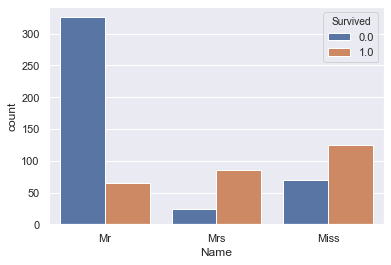

In [38]:
sns.countplot("Name", hue="Survived", data=titanic)

In [39]:
titanic['Name'].replace({"Miss":3, "Mrs":2, "Mr":1}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,1,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,2,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,2,female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,1,male,35.0,0,0,373450,8.0500,NaN,S
